In [286]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx
from scipy import stats
import statsmodels.formula.api as smf
import piecewise_regression as pwr

## Read File

In [142]:
gdf = gpd.read_file("clean_data.geojson")

<Axes: >

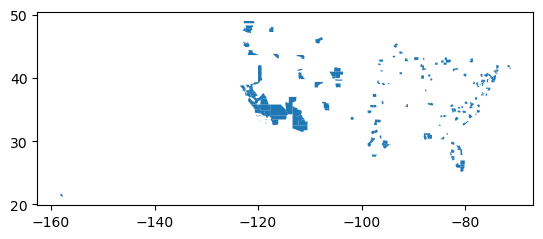

In [143]:
gdf.plot()

In [144]:
gdf

,County,State,Median Rent 2015,Median Rent 2023,Housing Units 2014,Population 2014,Net Migration 2015,Housing Units 2022,Population 2022,Net Migration 2023,Permits 2014,Single Family Permits 2014,Multifamily Permits 2014,Permits 2022,Single Family Permits 2022,Multifamily Permits 2022,Singe Family Permits 2014,Singe Family Permits 2022,geometry
0,LosAngeles,CA,1778.81,2740.42,12740,154071,-938,3642047,9719765,-78649,17659,4586.0,13073,26572,8253.0,18319,4586,8253,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
1,Cook,IL,1478.57,1921.00,7342,135435,2058,7538,17409,321,7753,1476.0,6277,8326,1052.0,7274,1476,1052,"POLYGON ((-83.57486 31.07813, -83.50996 31.205..."
2,Harris,TX,1203.14,1565.70,13758,25419,80,14738,36257,429,40060,18533.0,21527,38787,18156.0,20631,18533,18156,"POLYGON ((-95.84474 30.08891, -95.80333 30.090..."
3,Maricopa,AZ,954.61,1812.31,16237,202985,2145,1877620,4555833,17396,18597,9836.0,8761,40104,20608.0,19496,9836,20608,"POLYGON ((-113.33392 33.37742, -113.33333 33.5..."
4,SanDiego,CA,1680.15,2842.02,708284,850424,9289,1247318,3277176,-19978,6875,2487.0,4388,9346,3517.0,5829,2487,3517,"POLYGON ((-117.59619 33.38696, -117.57848 33.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Newport,RI,1219.34,2582.88,42158,82404,634,43668,84721,-671,185,110.0,75,124,124.0,0,110,124,"POLYGON ((-71.40843 41.47249, -71.38054 41.650..."
183,Barrow,GA,1055.48,1992.55,27000,101675,360,32274,89245,3196,444,380.0,64,1054,937.0,117,380,937,"POLYGON ((-83.81768 34.12749, -83.76753 34.066..."
184,Coryell,TX,724.79,1146.27,26116,75442,-590,29496,84205,256,146,114.0,32,409,299.0,110,114,299,"POLYGON ((-98.18001 31.46372, -97.76643 31.672..."
185,JamesCity,VA,1279.37,1811.26,31781,72104,904,34723,81483,1136,709,454.0,255,283,261.0,22,454,261,"POLYGON ((-76.89180 37.43263, -76.74198 37.467..."


## Exploratory Analysis

<Axes: xlabel='State', ylabel='Median Rent 2015'>

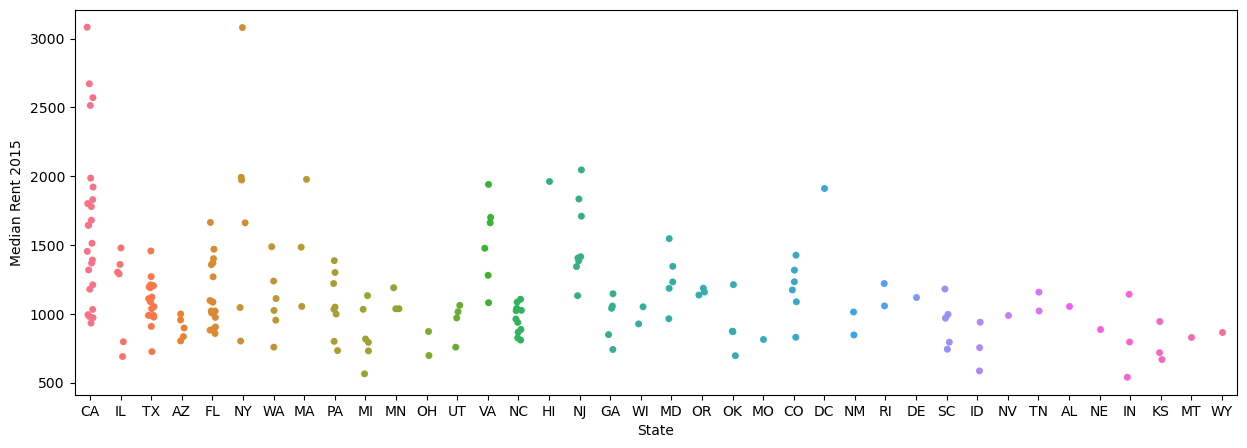

In [145]:
plt.figure(figsize=(15, 5))
sns.stripplot(data = gdf, x = 'State', y = 'Median Rent 2015', hue = 'State')

<Axes: xlabel='State', ylabel='Median Rent 2023'>

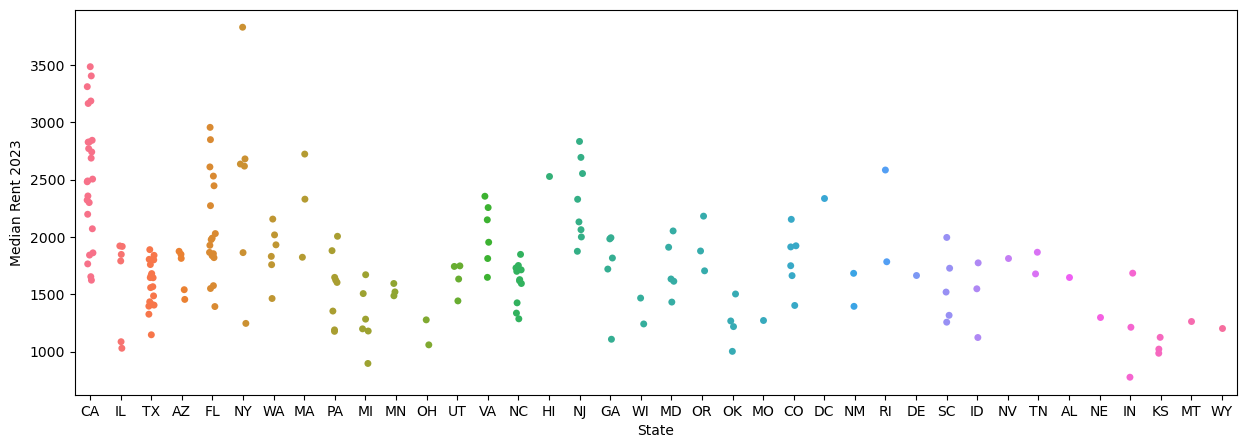

In [146]:
plt.figure(figsize=(15, 5))
sns.stripplot(data = gdf, x = 'State', y = 'Median Rent 2023', hue = 'State')

In [147]:
state_median_rent_2015 = gdf.groupby('State')['Median Rent 2015'].median().reset_index()
state_median_rent_2023 = gdf.groupby('State')['Median Rent 2023'].median().reset_index()

<Axes: xlabel='State', ylabel='Median Rent 2023'>

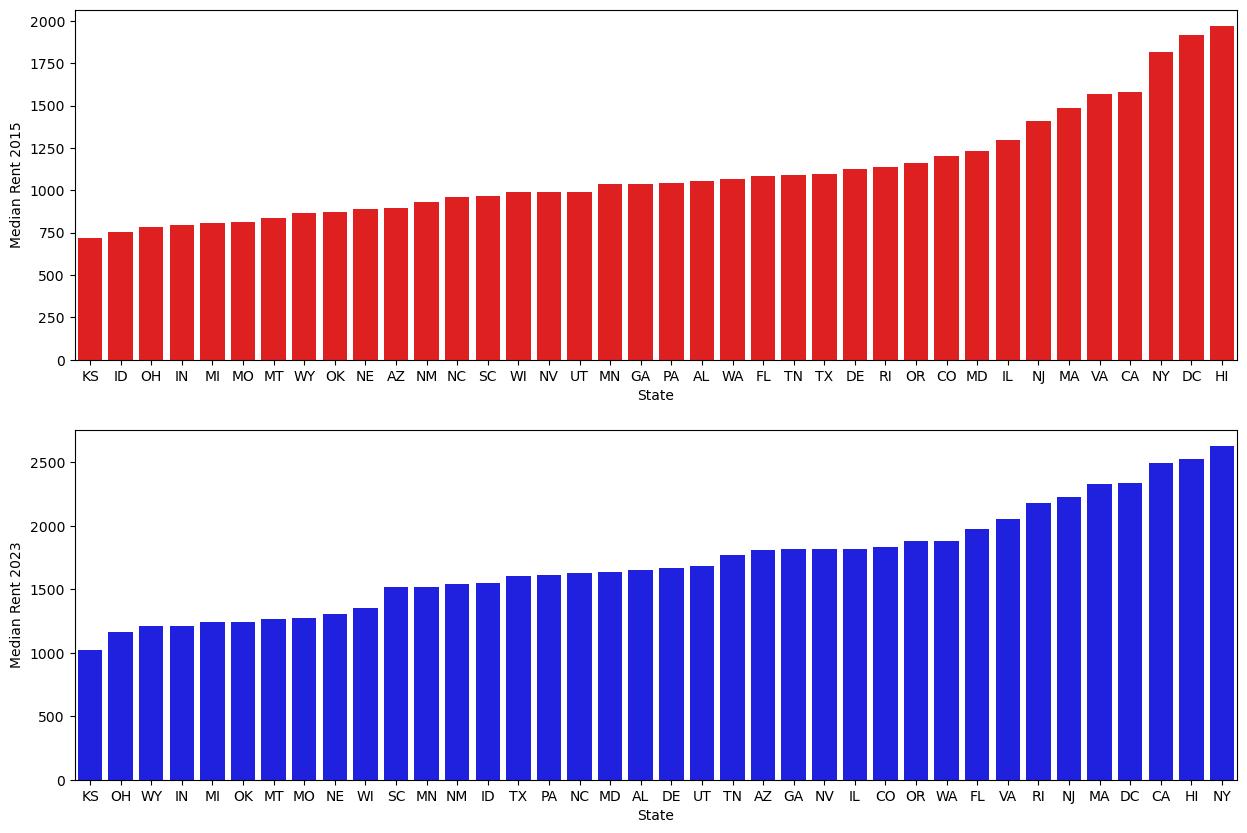

In [152]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(data=state_median_rent_2015, x='State', y='Median Rent 2015', color='red', ax=ax1, order=state_median_rent_2015.sort_values('Median Rent 2015')['State'])
sns.barplot(data=state_median_rent_2023, x='State', y='Median Rent 2023', color='blue', ax=ax2, order=state_median_rent_2023.sort_values('Median Rent 2023')['State'])

In [149]:
state_units_2014 = gdf.groupby('State')['Housing Units 2014'].sum().reset_index()
state_units_2022 = gdf.groupby('State')['Housing Units 2022'].sum().reset_index()

<Axes: xlabel='State', ylabel='Housing Units 2022'>

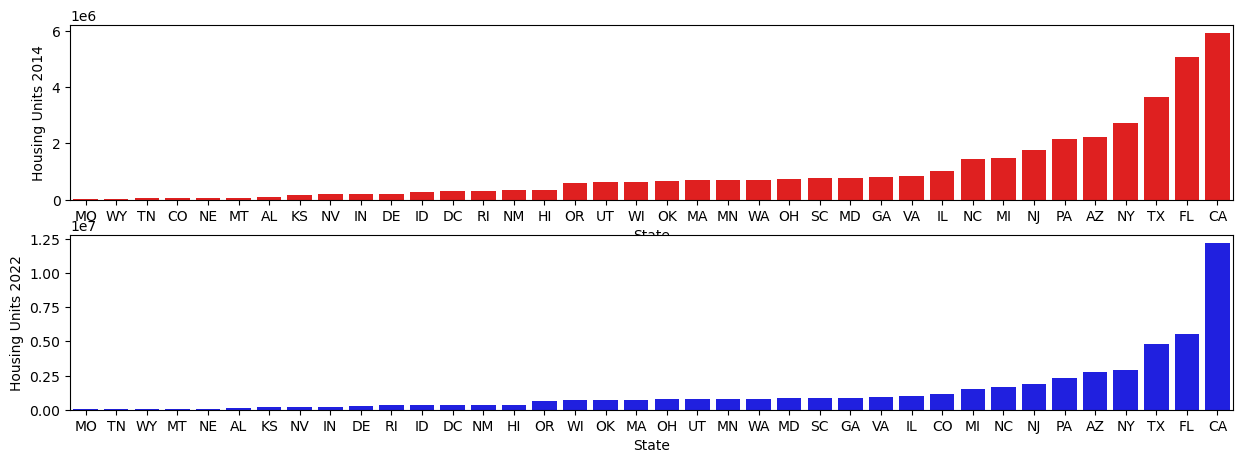

In [153]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))
sns.barplot(data=state_units_2014, x='State', y = 'Housing Units 2014', color = 'red', ax=ax1, order=state_units_2014.sort_values('Housing Units 2014')['State'])
sns.barplot(data=state_units_2022, x='State', y='Housing Units 2022', color='blue', ax=ax2, order=state_units_2022.sort_values('Housing Units 2022')['State'])

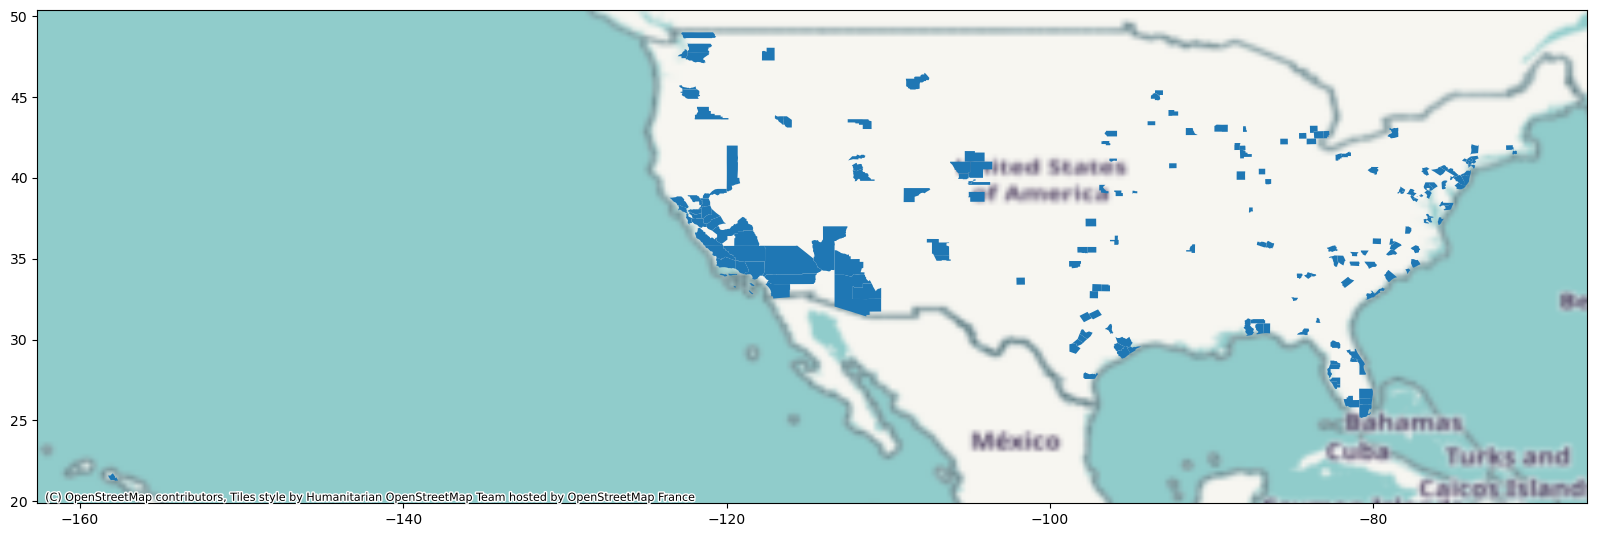

In [154]:
ax = gdf.plot(figsize=(20, 10))
cx.add_basemap(ax, crs = 4326)

## Rate of Change

In [155]:
gdf['Median Rent Change'] = gdf['Median Rent 2023'] - gdf['Median Rent 2015']
gdf['Housing Units Change'] = gdf['Housing Units 2022'] - gdf['Housing Units 2014']
gdf['Population Change'] = gdf['Population 2022'] - gdf['Population 2014']
gdf['Migration Change'] = gdf['Net Migration 2023'] - gdf['Net Migration 2015']
gdf['Permit Change'] = gdf['Permits 2022'] - gdf['Permits 2014']
gdf['Single Family Permit Change'] = gdf['Single Family Permits 2022'] - gdf['Single Family Permits 2014']
gdf['Multifamily Permit Change'] = gdf['Multifamily Permits 2022'] - gdf['Multifamily Permits 2014']

In [156]:
gdf

,County,State,Median Rent 2015,Median Rent 2023,Housing Units 2014,Population 2014,Net Migration 2015,Housing Units 2022,Population 2022,Net Migration 2023,...,Singe Family Permits 2014,Singe Family Permits 2022,geometry,Median Rent Change,Housing Units Change,Population Change,Migration Change,Permit Change,Single Family Permit Change,Multifamily Permit Change
0,LosAngeles,CA,1778.81,2740.42,12740,154071,-938,3642047,9719765,-78649,...,4586,8253,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",961.61,3629307,9565694,-77711,8913,3667.0,5246
1,Cook,IL,1478.57,1921.00,7342,135435,2058,7538,17409,321,...,1476,1052,"POLYGON ((-83.57486 31.07813, -83.50996 31.205...",442.43,196,-118026,-1737,573,-424.0,997
2,Harris,TX,1203.14,1565.70,13758,25419,80,14738,36257,429,...,18533,18156,"POLYGON ((-95.84474 30.08891, -95.80333 30.090...",362.56,980,10838,349,-1273,-377.0,-896
3,Maricopa,AZ,954.61,1812.31,16237,202985,2145,1877620,4555833,17396,...,9836,20608,"POLYGON ((-113.33392 33.37742, -113.33333 33.5...",857.70,1861383,4352848,15251,21507,10772.0,10735
4,SanDiego,CA,1680.15,2842.02,708284,850424,9289,1247318,3277176,-19978,...,2487,3517,"POLYGON ((-117.59619 33.38696, -117.57848 33.4...",1161.87,539034,2426752,-29267,2471,1030.0,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Newport,RI,1219.34,2582.88,42158,82404,634,43668,84721,-671,...,110,124,"POLYGON ((-71.40843 41.47249, -71.38054 41.650...",1363.54,1510,2317,-1305,-61,14.0,-75
183,Barrow,GA,1055.48,1992.55,27000,101675,360,32274,89245,3196,...,380,937,"POLYGON ((-83.81768 34.12749, -83.76753 34.066...",937.07,5274,-12430,2836,610,557.0,53
184,Coryell,TX,724.79,1146.27,26116,75442,-590,29496,84205,256,...,114,299,"POLYGON ((-98.18001 31.46372, -97.76643 31.672...",421.48,3380,8763,846,263,185.0,78
185,JamesCity,VA,1279.37,1811.26,31781,72104,904,34723,81483,1136,...,454,261,"POLYGON ((-76.89180 37.43263, -76.74198 37.467...",531.89,2942,9379,232,-426,-193.0,-233


In [157]:
gdf['Median Rent Percent Change'] = ((gdf['Median Rent Change'] / gdf['Median Rent 2023']) * 100).round(1)
gdf['Housing Units Percent Change'] = ((gdf['Housing Units Change'] / gdf['Housing Units 2022']) * 100).round(1)
gdf['Population Percent Change'] = ((gdf['Population Change'] / gdf['Population 2022']) * 100).round(1)
gdf['Migration Percent Change'] = ((gdf['Migration Change'] / gdf['Net Migration 2023']) * 100).round(1)
gdf['Permit Percent Change'] = ((gdf['Permit Change'] / gdf['Permits 2022']) * 100).round(1)
gdf['Single Family Permit Percent Change'] = ((gdf['Single Family Permit Change'] / gdf['Single Family Permits 2022']) * 100).round(1)
gdf['Multifamily Permit Percent Change'] = ((gdf['Multifamily Permit Change'] / gdf['Multifamily Permits 2022']) * 100).round(1)

In [158]:
gdf

,County,State,Median Rent 2015,Median Rent 2023,Housing Units 2014,Population 2014,Net Migration 2015,Housing Units 2022,Population 2022,Net Migration 2023,...,Permit Change,Single Family Permit Change,Multifamily Permit Change,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change
0,LosAngeles,CA,1778.81,2740.42,12740,154071,-938,3642047,9719765,-78649,...,8913,3667.0,5246,35.1,99.7,98.4,98.8,33.5,44.4,28.6
1,Cook,IL,1478.57,1921.00,7342,135435,2058,7538,17409,321,...,573,-424.0,997,23.0,2.6,-678.0,-541.1,6.9,-40.3,13.7
2,Harris,TX,1203.14,1565.70,13758,25419,80,14738,36257,429,...,-1273,-377.0,-896,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3
3,Maricopa,AZ,954.61,1812.31,16237,202985,2145,1877620,4555833,17396,...,21507,10772.0,10735,47.3,99.1,95.5,87.7,53.6,52.3,55.1
4,SanDiego,CA,1680.15,2842.02,708284,850424,9289,1247318,3277176,-19978,...,2471,1030.0,1441,40.9,43.2,74.1,146.5,26.4,29.3,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Newport,RI,1219.34,2582.88,42158,82404,634,43668,84721,-671,...,-61,14.0,-75,52.8,3.5,2.7,194.5,-49.2,11.3,-inf
183,Barrow,GA,1055.48,1992.55,27000,101675,360,32274,89245,3196,...,610,557.0,53,47.0,16.3,-13.9,88.7,57.9,59.4,45.3
184,Coryell,TX,724.79,1146.27,26116,75442,-590,29496,84205,256,...,263,185.0,78,36.8,11.5,10.4,330.5,64.3,61.9,70.9
185,JamesCity,VA,1279.37,1811.26,31781,72104,904,34723,81483,1136,...,-426,-193.0,-233,29.4,8.5,11.5,20.4,-150.5,-73.9,-1059.1


In [159]:
changerates_gdf = gdf[['County', 'State', 'Median Rent Percent Change', 'Housing Units Percent Change', 'Population Percent Change', 'Migration Percent Change', 'Permit Percent Change', 'Single Family Permit Percent Change', 'Multifamily Permit Percent Change']]

In [160]:
changerates_gdf

,County,State,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change
0,LosAngeles,CA,35.1,99.7,98.4,98.8,33.5,44.4,28.6
1,Cook,IL,23.0,2.6,-678.0,-541.1,6.9,-40.3,13.7
2,Harris,TX,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3
3,Maricopa,AZ,47.3,99.1,95.5,87.7,53.6,52.3,55.1
4,SanDiego,CA,40.9,43.2,74.1,146.5,26.4,29.3,24.7
...,...,...,...,...,...,...,...,...,...
182,Newport,RI,52.8,3.5,2.7,194.5,-49.2,11.3,-inf
183,Barrow,GA,47.0,16.3,-13.9,88.7,57.9,59.4,45.3
184,Coryell,TX,36.8,11.5,10.4,330.5,64.3,61.9,70.9
185,JamesCity,VA,29.4,8.5,11.5,20.4,-150.5,-73.9,-1059.1


## Exploratory Analysis 2

<Axes: xlabel='Multifamily Permit Percent Change', ylabel='Median Rent Percent Change'>

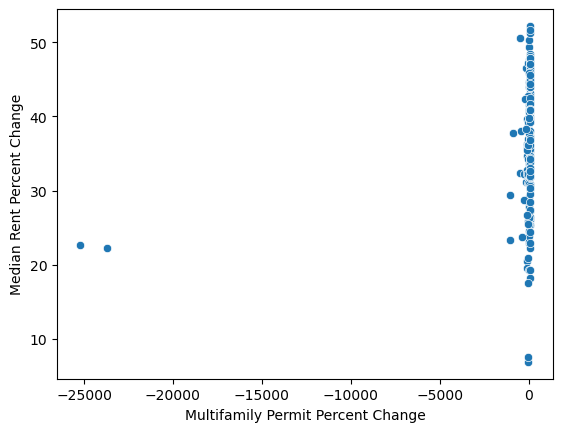

In [161]:
sns.scatterplot(data = changerates_gdf, x = 'Multifamily Permit Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Housing Units Percent Change', ylabel='Median Rent Percent Change'>

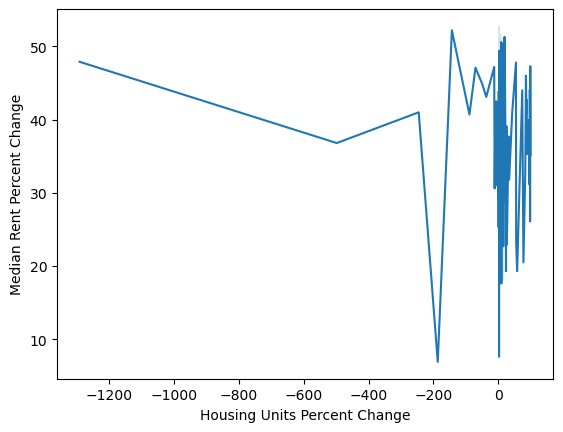

In [162]:
sns.lineplot(data = gdf, x = 'Housing Units Percent Change', y ='Median Rent Percent Change')

## Data Cleaning 2

In [163]:
changerates_gdf['Median Rent Percent Change'].describe()

count    187.000000
mean      35.775936
std        8.499260
min        6.900000
25%       30.900000
50%       36.100000
75%       42.200000
max       52.800000
Name: Median Rent Percent Change, dtype: float64

<Axes: ylabel='Median Rent Percent Change'>

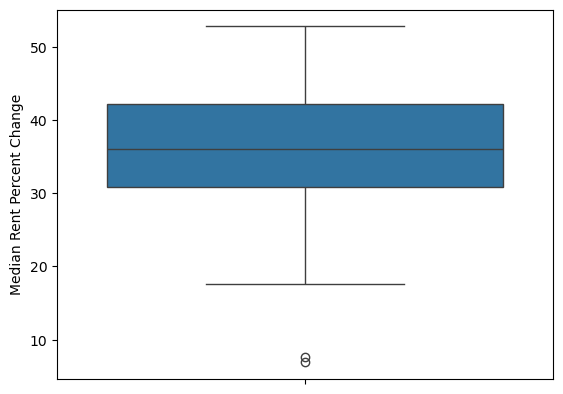

In [164]:
sns.boxplot(changerates_gdf['Median Rent Percent Change'])

In [165]:
changerates_gdf['Housing Units Percent Change'].describe()

count     187.000000
mean        4.766310
std       110.146522
min     -1291.400000
25%         3.850000
50%         8.700000
75%        16.100000
max        99.700000
Name: Housing Units Percent Change, dtype: float64

<Axes: ylabel='Housing Units Percent Change'>

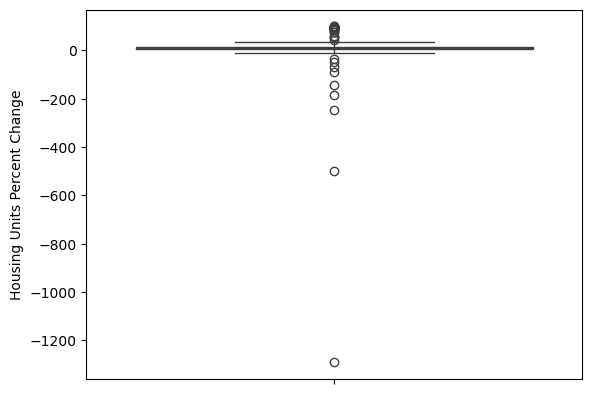

In [166]:
sns.boxplot(changerates_gdf['Housing Units Percent Change'])

<Axes: ylabel='Population Percent Change'>

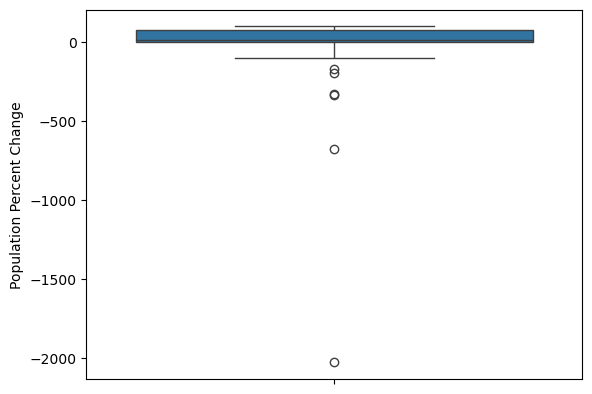

In [167]:
sns.boxplot(changerates_gdf['Population Percent Change'])

<Axes: ylabel='Migration Percent Change'>

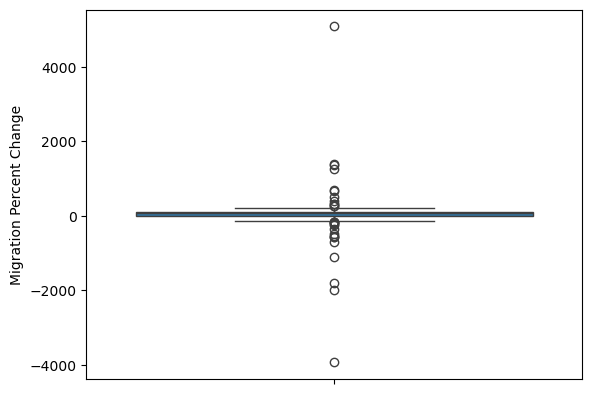

In [168]:
sns.boxplot(changerates_gdf['Migration Percent Change'])

<Axes: ylabel='Permit Percent Change'>

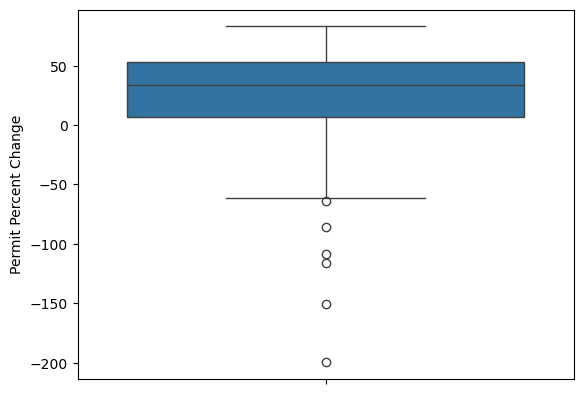

In [169]:
sns.boxplot(changerates_gdf['Permit Percent Change'])

<Axes: ylabel='Single Family Permit Percent Change'>

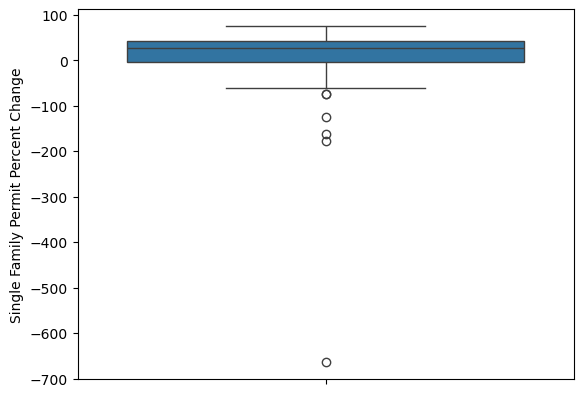

In [170]:
sns.boxplot(changerates_gdf['Single Family Permit Percent Change'])

<Axes: ylabel='Multifamily Permit Percent Change'>

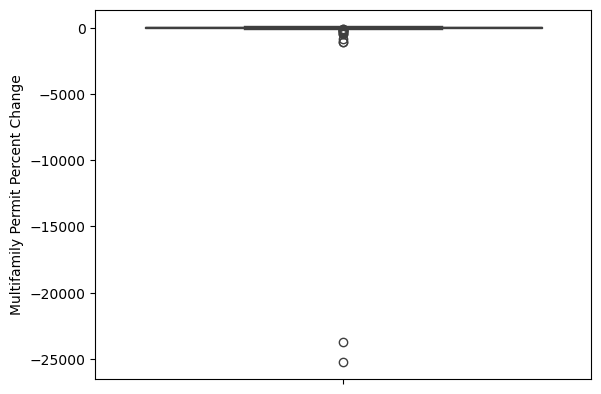

In [171]:
sns.boxplot(changerates_gdf['Multifamily Permit Percent Change'])

In [222]:
filtered_gdf = changerates_gdf.query('(`Median Rent Percent Change` > 10) & (`Permit Percent Change` > -100) & (`Migration Percent Change` > -500) & (`Migration Percent Change` < 2000) & (`Population Percent Change` > -100) & (`Housing Units Percent Change` > -50) & (`Single Family Permit Percent Change` > -200) & (`Multifamily Permit Percent Change` > -100)')

## Exploratory Analysis 3

<Axes: xlabel='Multifamily Permit Percent Change', ylabel='Median Rent Percent Change'>

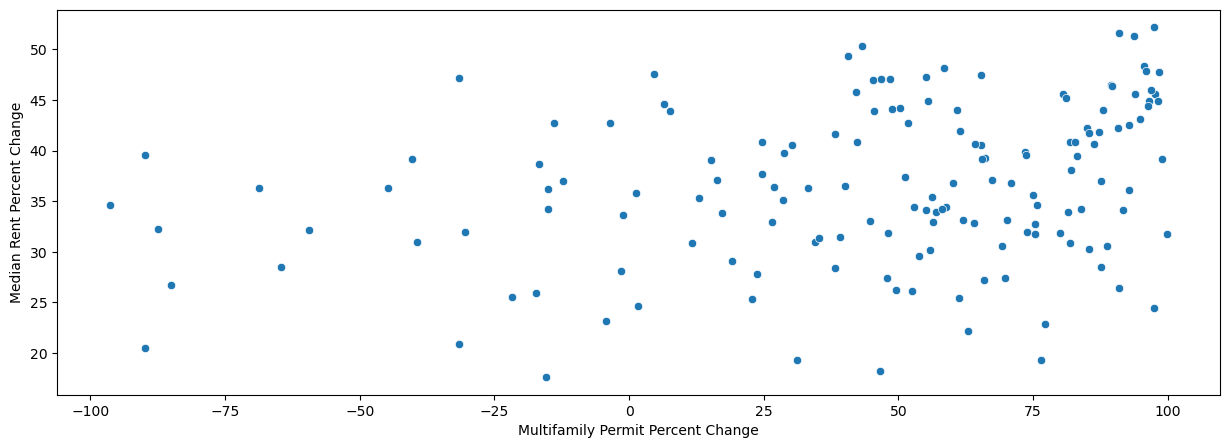

In [211]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Multifamily Permit Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Housing Units Percent Change', ylabel='Median Rent Percent Change'>

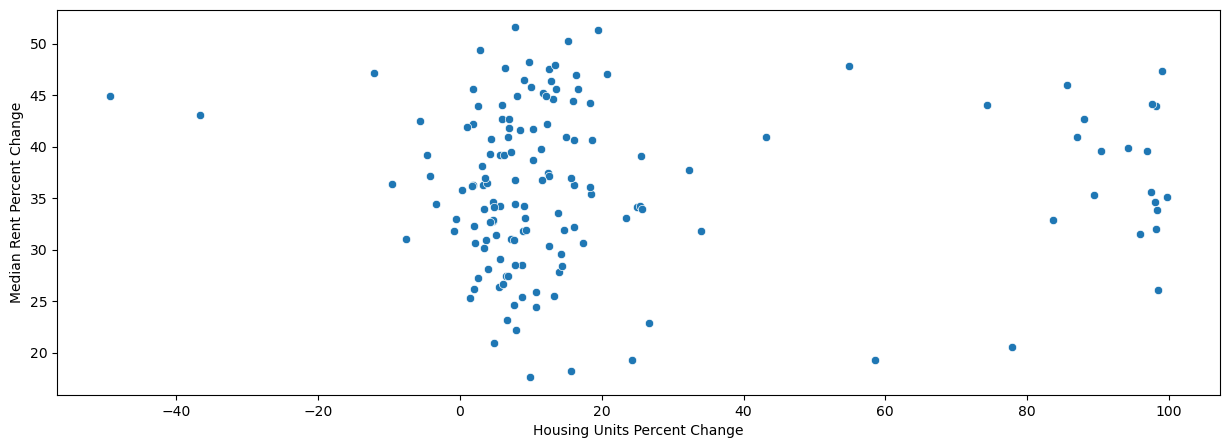

In [217]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Housing Units Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Population Percent Change', ylabel='Median Rent Percent Change'>

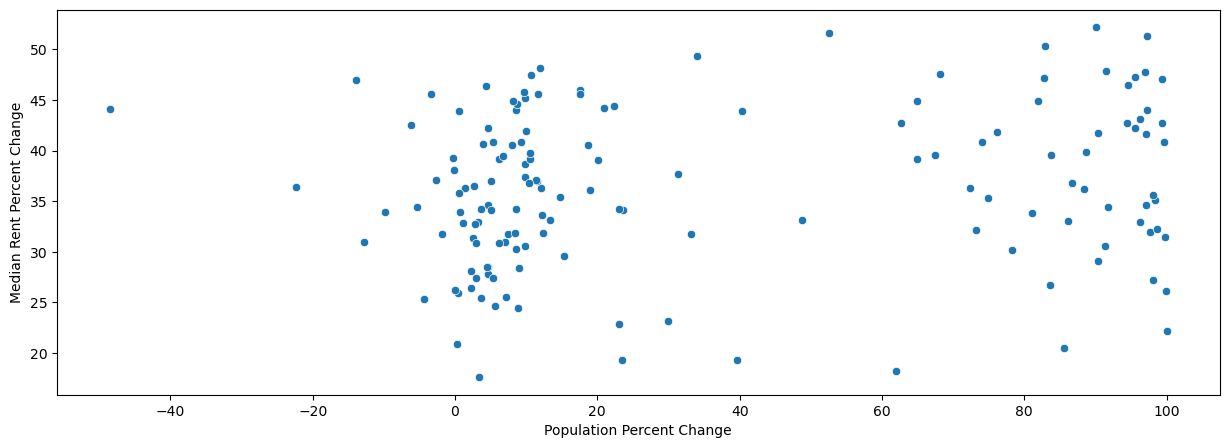

In [215]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Population Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Permit Percent Change', ylabel='Median Rent Percent Change'>

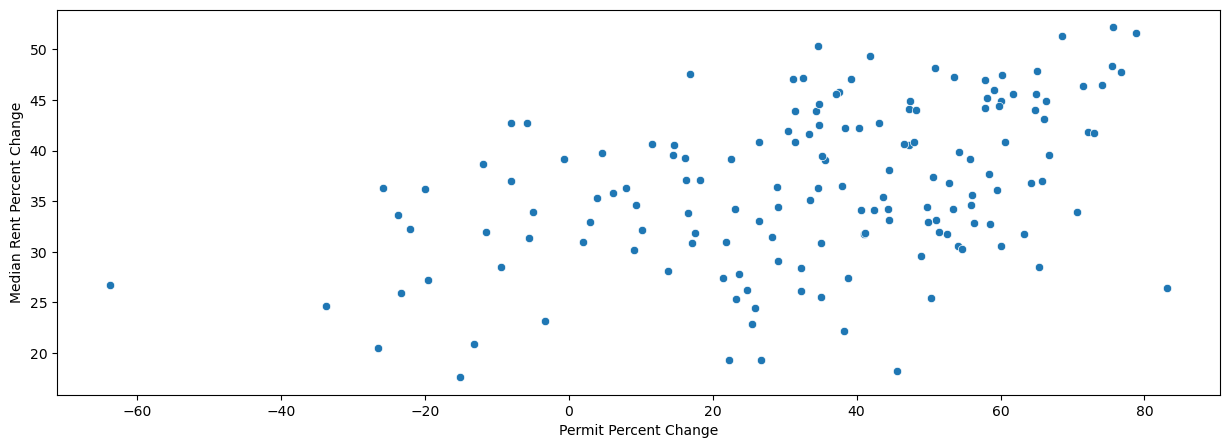

In [213]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Permit Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Single Family Permit Percent Change', ylabel='Median Rent Percent Change'>

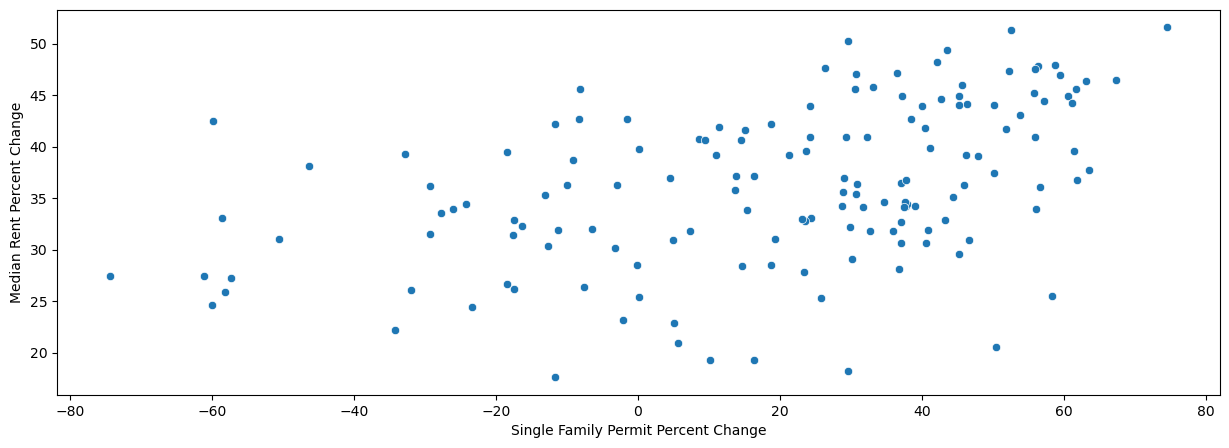

In [220]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Single Family Permit Percent Change', y = 'Median Rent Percent Change')

<Axes: xlabel='Migration Percent Change', ylabel='Median Rent Percent Change'>

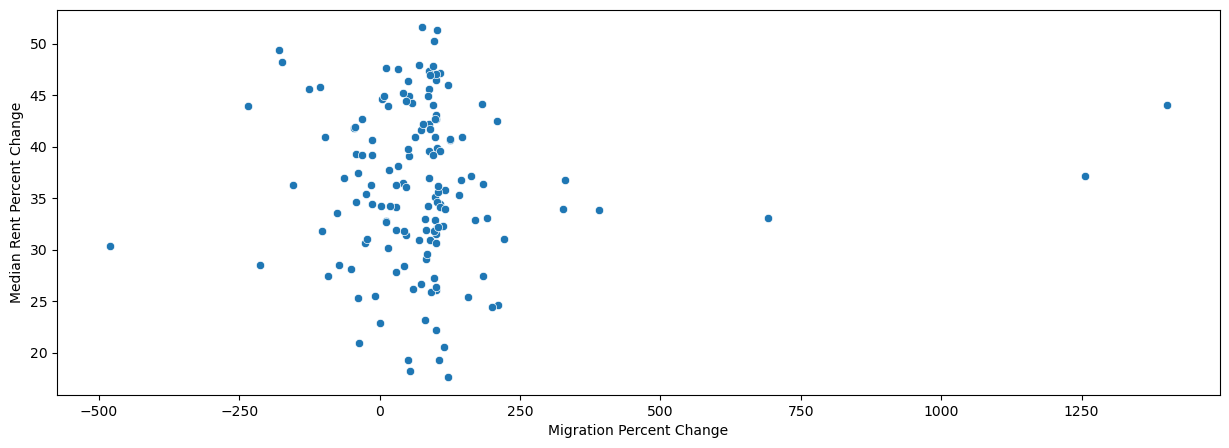

In [223]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Migration Percent Change', y = 'Median Rent Percent Change')

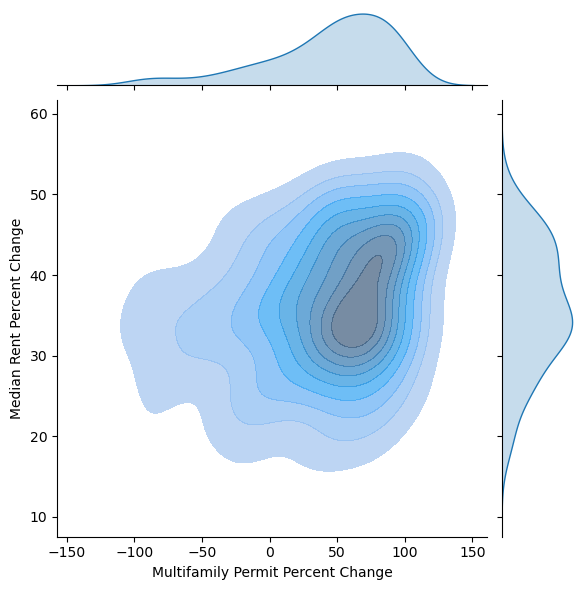

In [224]:
sns.jointplot(data = filtered_gdf, x = 'Multifamily Permit Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')

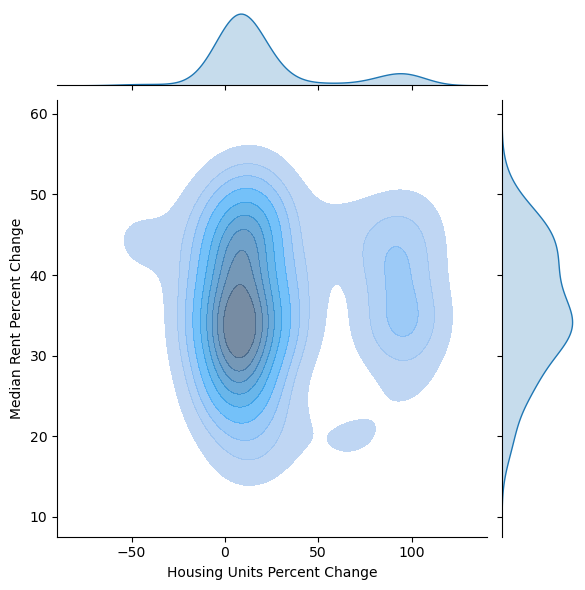

In [225]:
sns.jointplot(data = filtered_gdf, x = 'Housing Units Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')

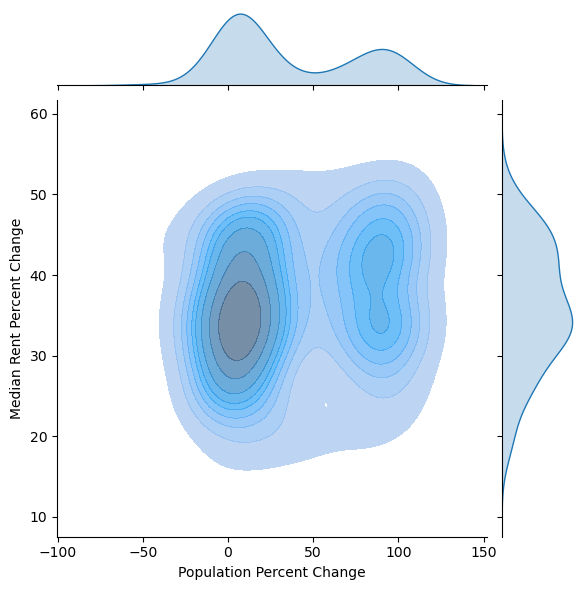

In [226]:
sns.jointplot(data = filtered_gdf, x = 'Population Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')

## Modeling

In [249]:
filtered_gdf

,County,State,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change
0,LosAngeles,CA,35.1,99.7,98.4,98.8,33.5,44.4,28.6
2,Harris,TX,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3
3,Maricopa,AZ,47.3,99.1,95.5,87.7,53.6,52.3,55.1
4,SanDiego,CA,40.9,43.2,74.1,146.5,26.4,29.3,24.7
5,Miami-Dade,FL,41.6,8.5,97.1,74.0,33.4,15.1,38.3
...,...,...,...,...,...,...,...,...,...
178,Bonneville,ID,47.9,13.4,91.5,70.7,65.1,58.7,95.9
180,Wicomico,MD,32.7,4.3,2.8,10.7,58.6,37.1,75.4
181,Laramie,WY,28.5,7.7,4.5,-213.2,65.3,18.7,87.6
183,Barrow,GA,47.0,16.3,-13.9,88.7,57.9,59.4,45.3


In [277]:
x = filtered_gdf['Median Rent Percent Change']
y = filtered_gdf['Permit Percent Change']

In [278]:
formula = 'x ~ y'

In [280]:
model = smf.ols(formula, data = filtered_gdf).fit()

In [281]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     31.75
Date:                Wed, 01 May 2024   Prob (F-statistic):           8.94e-08
Time:                        19:33:59   Log-Likelihood:                -490.45
No. Observations:                 146   AIC:                             984.9
Df Residuals:                     144   BIC:                             990.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1036      0.918     34.982      0.000      30.290      33.917
y              0.1197      0.021      5.634      0.000       0.078       0.162
==============================================================================
Omnibus:                        4.535   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.043
Skew:                          -0.329   Prob(JB):                        0.132
Kurtosis:                       2.518   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

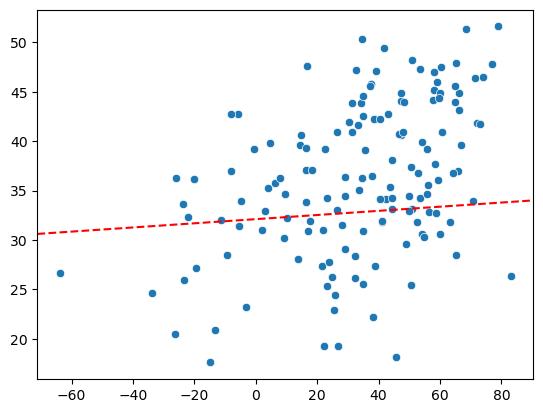

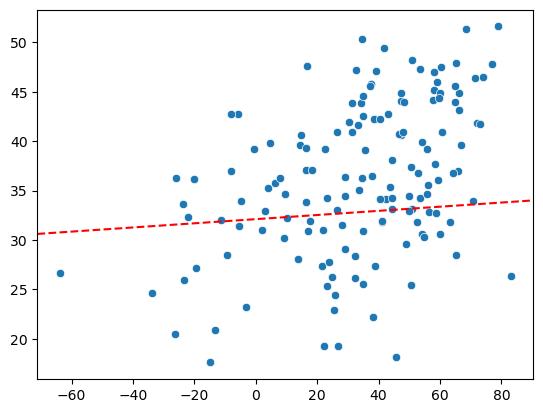

In [291]:
ax = sns.scatterplot(y = model.model.endog,
                     x = model.model.exog[:, 1])
sm.graphics.abline_plot(intercept = 32.1036, slope = 0.021, ax = ax, color = 'red', linestyle = '--')

In [288]:
x = filtered_gdf['Permit Percent Change'].values
y = filtered_gdf['Median Rent Percent Change'].values

In [292]:
pw_reg = pwr.Fit(x, y, n_breakpoints = 1)

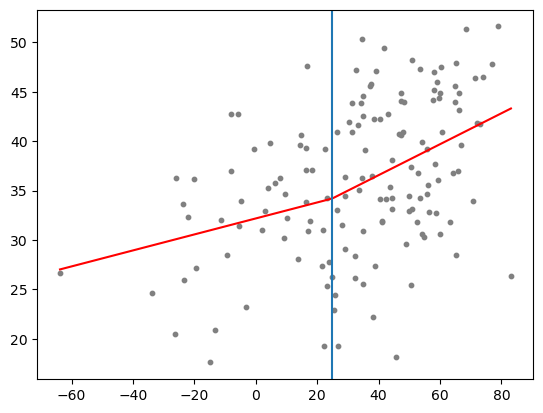

In [293]:
pw_reg.plot_data(color = 'grey', s = 10)
pw_reg.plot_fit(color = 'red')
pw_reg.plot_breakpoints()

In [294]:
pw_reg.summary()


                    Breakpoint Regression Results                     
No. Observations                      146
No. Model Parameters                    4
Degrees of Freedom                    142
Res. Sum of Squares               7021.94
Total Sum of Squares              8633.71
R Squared                        0.186683
Adjusted R Squared               0.163610
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                32.1776         1.03       31.308      1.29e-65       30.146       34.209
alpha1             0.0808894       0.0539       1.4999         0.136     -0.02572       0.1875
beta1              0.0756152       0.0737       1.0263             -    -0.070029      0.22126
breakpoint1          24.8801         28.4            -             -      -31.329       81.089
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      146\nNo. Model Parameters                    4\nDegrees of Freedom                    142\nRes. Sum of Squares               7021.94\nTotal Sum of Squares              8633.71\nR Squared                        0.186683\nAdjusted R Squared               0.163610\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                32.1776         1.03       31.308      1.29e-65       30.